In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

import ast  # For safely evaluating strings that represent lists

def convert_string_to_list(string):
    try:
        # Safely evaluate the string as a Python literal (list)
        return ast.literal_eval(string)
    except:
        # If the conversion fails, return the original value
        return string

In [2]:
import ast  # For safely evaluating strings that represent lists

def convert_string_to_list(string):
    try:
        # Safely evaluate the string as a Python literal (list)
        return ast.literal_eval(string)
    except:
        # If the conversion fails, return the original value
        return string
fixed_df = pd.read_csv("fixed_df.csv")

print(fixed_df.columns)

fixed_df = fixed_df.map(convert_string_to_list)

Index(['SMILES', 'r_concentration_uM_x', 'r_inhibition_list_x',
       'f_concentration_uM_x', 'f_inhibition_list_x', 'r_concentration_uM_y',
       'r_inhibition_list_y', 'f_concentration_uM_y', 'f_inhibition_list_y',
       'r_concentration_uM_x.1', 'r_inhibition_list_x.1',
       'f_concentration_uM_x.1', 'f_inhibition_list_x.1',
       'r_concentration_uM_y.1', 'r_inhibition_list_y.1',
       'f_concentration_uM_y.1', 'f_inhibition_list_y.1',
       'r_concentration_uM_x.1.1', 'r_inhibition_list_x.1.1',
       'f_concentration_uM_x.1.1', 'f_inhibition_list_x.1.1',
       'r_concentration_uM_y.1.1', 'r_inhibition_list_y.1.1',
       'f_concentration_uM_y.1.1', 'f_inhibition_list_y.1.1',
       'r_concentration_uM_x.1.1.1', 'r_inhibition_list_x.1.1.1',
       'f_concentration_uM_x.1.1.1', 'f_inhibition_list_x.1.1.1',
       'r_concentration_uM_y.1.1.1', 'r_inhibition_list_y.1.1.1',
       'f_concentration_uM_y.1.1.1', 'f_inhibition_list_y.1.1.1',
       'r_concentration_uM_x.1.1.1.1'

In [3]:
def deduplicate_columns(df):
    deduplicated_df = pd.DataFrame()
    root_names = set(col.split('_x')[0] for col in df.columns if '_x' in col)

    for root in root_names:
        x_column = f'{root}_x'
        y_column = f'{root}_y'
        if x_column in df.columns:
            deduplicated_df[root] = df[x_column]
        elif y_column in df.columns:
            deduplicated_df[root] = df[y_column]

    # Add columns that do not have 'x' or 'y' variants
    for col in df.columns:
        if '_x' not in col and '_y' not in col and col not in deduplicated_df.columns:
            deduplicated_df[col] = df[col]

    return deduplicated_df

deduplicated_df = deduplicate_columns(fixed_df)



print(deduplicated_df.columns)


Index(['f_inhibition_list', 'r_concentration_uM', 'r_inhibition_list',
       'f_concentration_uM', 'SMILES', 'r_inhibition_at_20_uM',
       'r_inhibition_at_50_uM', 'r_avg_IC50', 'f_inhibition_at_20_uM',
       'f_inhibition_at_50_uM', 'f_avg_IC50', 'f_avg_pIC50', 'trypsin_IC50'],
      dtype='object')


In [4]:
def separate_assays(df):
    # Separate based on NaN values in the avg_IC50 columns
    r_assay_df = df[np.isnan(df['r_avg_IC50'])]
    f_assay_df = df[np.isnan(df['f_avg_IC50'])]

    return r_assay_df.copy(), f_assay_df.copy()

# Assuming df is your original DataFrame
# df = pd.read_csv('your_data.csv')  # Load your DataFrame

# Apply the function
f_assay_df, r_assay_df = separate_assays(deduplicated_df)


In [5]:
r_assay_df.to_csv('r_assay_df.csv')
f_assay_df.to_csv('f_assay_df.csv')



In [6]:
import plotly.express as px

import matplotlib.pyplot as plt 

In [13]:
print(f_assay_df.f_concentration_uM[0][0].type)

AttributeError: 'float' object has no attribute 'type'

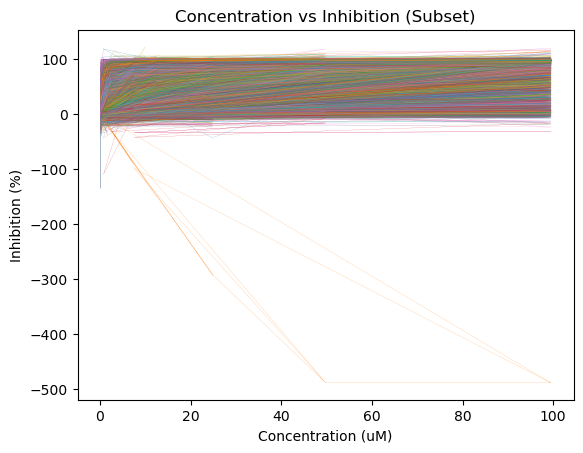

In [23]:

subset_df = f_assay_df.dropna(subset=['f_concentration_uM', 'f_inhibition_list'])
# subset_df = subset_df.head(10)  # Selecting first 10 rows for plotting

# Redefining the plot function for the subset
def plot_subset_concentration_vs_inhibition(dataframe):
    fig, ax = plt.subplots()
    fig.set

    for index, row in dataframe.iterrows():
        concentrations = row['f_concentration_uM']
        inhibitions = row['f_inhibition_list']
        ax.plot(concentrations, inhibitions, label=f'Row {index}', lw=0.1)

    ax.set_xlabel('Concentration (uM)')
    ax.set_ylabel('Inhibition (%)')
    ax.set_title('Concentration vs Inhibition (Subset)')
    # ax.legend()

    return fig

# Plotting the subset data
plot_figure_subset = plot_subset_concentration_vs_inhibition(subset_df)
plt.show()


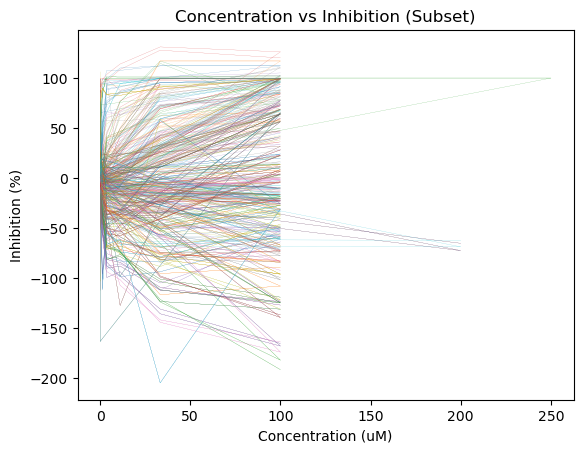

In [24]:
# To avoid performance issues, we will select a subset of the data for plotting
# Let's select the first 10 rows where the lengths of concentration and inhibition lists match

subset_df = r_assay_df.dropna(subset=['r_concentration_uM', 'r_inhibition_list'])
# subset_df = subset_df.head(10)  # Selecting first 10 rows for plotting

# Redefining the plot function for the subset
def plot_subset_concentration_vs_inhibition(dataframe):
    fig, ax = plt.subplots()
    fig.set

    for index, row in dataframe.iterrows():
        concentrations = row['r_concentration_uM']
        inhibitions = row['r_inhibition_list']
        ax.plot(concentrations, inhibitions, label=f'Row {index}', lw=0.1)

    ax.set_xlabel('Concentration (uM)')
    ax.set_ylabel('Inhibition (%)')
    ax.set_title('Concentration vs Inhibition (Subset)')
    # ax.legend()

    return fig

# Plotting the subset data
plot_figure_subset = plot_subset_concentration_vs_inhibition(subset_df)
plt.show()


In [ ]:
print(fixed_df["f_concentration_uM_y.1.1.1.1"])
print(fixed_df["f_concentration_uM_y"])

0        []
1        []
2        []
3        []
4        []
       ... 
2468     []
2469     []
2470     []
2471    NaN
2472    NaN
Name: f_concentration_uM_y.1.1.1.1, Length: 2473, dtype: object
0        []
1        []
2        []
3        []
4        []
       ... 
2468    NaN
2469    NaN
2470    NaN
2471    NaN
2472    NaN
Name: f_concentration_uM_y, Length: 2473, dtype: object


In [ ]:
fixed_df.head()

,SMILES,r_concentration_uM_x,r_inhibition_list_x,f_concentration_uM_x,f_inhibition_list_x,r_concentration_uM_y,r_inhibition_list_y,f_concentration_uM_y,f_inhibition_list_y,r_concentration_uM_x.1,...,r_avg_IC50,r_concentration_uM,r_inhibition_list,f_inhibition_at_20_uM,f_inhibition_at_50_uM,f_avg_IC50,f_avg_pIC50,f_concentration_uM,f_inhibition_list,trypsin_IC50
0,N#Cc1cccc(NC(=O)Nc2cncc(N)c2)c1,NaN,NaN,[],[],NaN,NaN,[],[],NaN,...,NaN,NaN,NaN,NaN,NaN,54.272964,NaN,[],[],99.0
1,N#Cc1cccc(NC(=O)Nc2c[nH]c3ncccc23)c1,NaN,NaN,[],[],NaN,NaN,[],[],NaN,...,NaN,NaN,NaN,NaN,NaN,63.554925,NaN,[],[],99.0
2,N#Cc1cccc(NC(=O)Cc2cncc3ccccc23)c1,[],"[87.13432893410572, 70.99683314259158, 44.1865...",[],[],[],"[87.13432893410572, 70.99683314259158, 44.1865...",[],[],[],...,14.641091,[],"[87.13432893410572, 70.99683314259158, 44.1865...",NaN,NaN,26.719515,NaN,[],[],NaN
3,O=C(Cc1cncc2ccccc12)Nc1ccccc1,[],"[75.57385484282172, 40.76427177018337, 12.2779...",[],[],[],"[75.57385484282172, 40.76427177018337, 12.2779...",[],[],[],...,45.077469,[],"[75.57385484282172, 40.76427177018337, 12.2779...",NaN,NaN,57.590417,NaN,[],[],99.0
4,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,NaN,NaN,[],[],NaN,NaN,[],[],NaN,...,NaN,NaN,NaN,NaN,NaN,99.010000,NaN,[],[],99.0


In [ ]:
import plotly.express as px


fig = px.bar(fixed_df.r_inhibition_list.value_counts().round(2))
fig.show()


In [ ]:
# plot histograms of r_avg_IC50 and f_avg_IC50 using plotly

import plotly.express as px

fig = px.histogram(fixed_df, x="r_avg_IC50", nbins=100)
fig.show()

fig = px.histogram(fixed_df, x="f_avg_IC50", nbins=100)
fig.show()







In [74]:
# plot r_avg_IC50 against f_avg_IC50 using plotly with histograms on the axes

#filter only values below 96

filter_df = fixed_df[(fixed_df["r_avg_IC50"] > 0) & (fixed_df["r_avg_IC50"] < 98)]
filter_df = filter_df[(filter_df["f_avg_IC50"] > 0) & (filter_df["f_avg_IC50"] < 98)]


fig = px.scatter(filter_df, x="r_avg_IC50", y="f_avg_IC50", marginal_x="histogram", marginal_y="histogram")
fig.show()

print(filter_df["r_avg_IC50"].mean())
print(filter_df["f_avg_IC50"].mean())
print(filter_df["r_avg_IC50"].std())
print(filter_df["f_avg_IC50"].std())

12.273988823470717
12.67645217114503
20.859015161507326
19.856435710074592


In [52]:
# plot r_avg_IC50 against f_avg_IC50 using plotly with histograms on the axes

#filter only values below 96

filter_df = fixed_df[fixed_df["r_avg_IC50"] > 98]
filter_df = filter_df[filter_df["f_avg_IC50"] > 98]

fig = px.scatter(filter_df, x="r_avg_IC50", y="f_avg_IC50", marginal_x="histogram", marginal_y="histogram")
fig.show()
print(filter_df["r_avg_IC50"].mean())
print(filter_df["f_avg_IC50"].mean())

99.00576741218383
99.49999999999997


In [91]:
# plot r_avg_IC50 against f_avg_IC50 using plotly with histograms on the axes

#filter only values above 98

filter_df = fixed_df[fixed_df["r_avg_IC50"] > 98]
filter_df = filter_df[filter_df["f_avg_IC50"] > 98]

# add gaussian noise to the values mean 100 std 20

filter_df["r_avg_IC50"] = filter_df["r_avg_IC50"] + np.random.normal(0, 10, filter_df["r_avg_IC50"].shape)
filter_df["f_avg_IC50"] = filter_df["f_avg_IC50"] + np.random.normal(0, 10, filter_df["f_avg_IC50"].shape)

noise_df = filter_df.copy()



fig = px.scatter(noise_df[(noise_df["f_avg_IC50"] > 98) & (noise_df["r_avg_IC50"] > 98)], x="r_avg_IC50", y="f_avg_IC50", marginal_x="histogram", marginal_y="histogram")

fig.show()



In [90]:
pure_df = fixed_df[fixed_df["r_avg_IC50"] < 98]
pure_df = pure_df[pure_df["f_avg_IC50"] < 98]

# concat pure and noise df

mixed_df = pd.concat([pure_df, noise_df])

fig = px.scatter(mixed_df, x="r_avg_IC50", y="f_avg_IC50", marginal_x="histogram", marginal_y="histogram")

fig.show()